# GRIP:- The Sparks Foundation

### Data Science And Business Analytics Intern

### Task1:- Prediction using supervised  ML
### Predict the percentage of an student based on the no. of study hours. 


### Author: Priyadharshini.P

# DATA PREPARATION AND CLEANING

###### In this section we will first load the downloaded dataset in data frame using pandas. Then we will read this dataset using read_csv function. We will explore our data through various columns and rows and find some missing or null values in our data and will clean or replace the irrelevant data wherever necessary.

In [2]:
import pandas as  pd

In [3]:
dataset_url = "https://bit.ly/w-data"

In [4]:
data=pd.read_csv(dataset_url)

# READING THE DATA

In [5]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
data.shape

(25, 2)

In [7]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


From above we can observe that there is **no null value**  in our dataset so there is no need of cleaning the data

In [12]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# DATA ANALYISATION

We can visualize our dataframe through various plots,graphs by using the **matplotlib** and **seaborn** libraries.
To use these libraries we need to first import them.

IMPORTING REQUIRED LIBRARIES

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

PLOTTING THE GRAPH

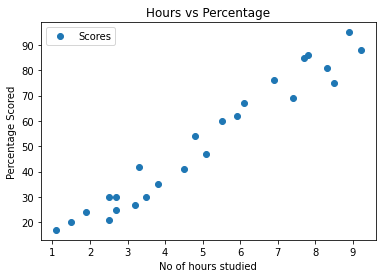

In [14]:
data.plot(x='Hours', y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('No of hours studied')
plt.ylabel('Percentage Scored')
plt.show()

# DATA PROCESSING

In [15]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

# SPLITTING THE DATA SET INTO TRAINING SET AND TEST SET

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test= train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=0)

## Training the Simple Linear Regression model on training Set

In [17]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train , y_train) 

LinearRegression()

In [18]:
print(regressor.intercept_)
print(regressor.coef_)

2.3708153823418883
[9.78856669]


### PLOTTING THE REGRESSION LINE

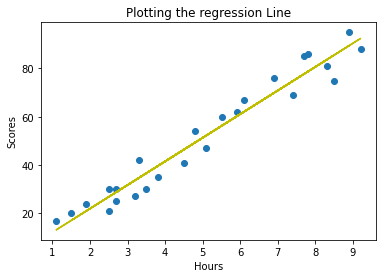

In [19]:
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,'y')
plt.title("Plotting the regression Line")
plt.ylabel('Scores')
plt.xlabel('Hours')
plt.show()

##### From the above graph, we can see that there is a Positive Linear relationship between the number of hours studied and the scores obtained. We can say that the increase of Hours studied(x), there is an increase in the scores obatined(y)

## PREDICTING THE TEST SET RESULT

In [20]:
#print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [21]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


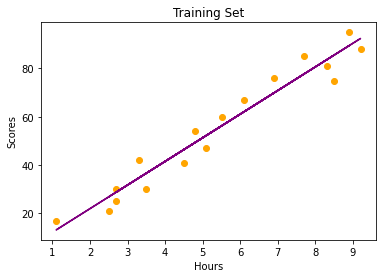

In [22]:
plt.scatter(x_train,y_train,color='orange')
plt.plot(x_train,regressor.predict(x_train),color='purple')
plt.title('Training Set')
plt.xlabel('Hours')
plt.ylabel('Scores');

# Predicted score if the student studies for 9.25 hours/day?

In [23]:
print(regressor.predict([[9.25]]))

[92.91505723]


### So the Predicted Score is 92.91!

# EVALUATION OF THE MODEL

##### The final step is to evaluate the performance of model.
##### Here we find the Mean Absolute Error.

In [24]:
from sklearn import metrics 
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.419727808027651


## THANK YOU!